In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

In [2]:
# bases do CNES
CNES = pd.read_csv('tbEstabelecimento202305.csv',low_memory=False, encoding="ISO-8859-1", sep=';')

## obtendo CNES da paraíba(estado 25)

In [4]:
# filtro CNES PB
cnes_paraiba = CNES.loc[CNES["CO_ESTADO_GESTOR"]==25]
cnes_paraiba.sample(5)

,CO_UNIDADE,CO_CNES,NU_CNPJ_MANTENEDORA,TP_PFPJ,NIVEL_DEP,NO_RAZAO_SOCIAL,NO_FANTASIA,NO_LOGRADOURO,NU_ENDERECO,NO_COMPLEMENTO,...,TP_ESTAB_SEMPRE_ABERTO,ST_GERACREDITO_GERENTE_SGIF,ST_CONEXAO_INTERNET,CO_TIPO_UNIDADE,NO_FANTASIA_ABREV,TP_GESTAO,"TO_CHAR(DT_ATUALIZACAO_ORIGEM,'DD/MM/YYYY')",CO_TIPO_ESTABELECIMENTO,CO_ATIVIDADE_PRINCIPAL,ST_CONTRATO_FORMALIZADO
178035,2505209303928,9303928,8.781791e+12,3,3,PREFEITURA MUNICIPAL DE CUITEGI,UNIDADE ANCORA DO PSF II MALHADA,SITIO MALHADA,01,NaN,...,N,NaN,N,NaN,NaN,M,05/09/2017,1.0,12.0,NaN
199544,2507502894920,2894920,NaN,3,1,MEIRA PONTES MEDICOS ASSOCIADOS LTDA,SOS OTORRINO,LINO ALVES DE OLIVEIRA,18,SALA 202,...,N,NaN,S,NaN,NaN,M,27/04/2022,16.0,1.0,N
208716,2502406750869,6750869,8.924037e+12,3,3,SAMU BONITO DE SANTA FE PB,SAMU BONITO DE SANTA FE PB,APRIGIO PEREIRA DA SILVA,S/N,PREDIO,...,S,NaN,S,NaN,NaN,M,22/05/2011,8.0,7.0,S
43895,2507500899607,899607,NaN,3,1,LINS ALMEIDA LTDA,ESPACO MENTE E CORPO,JUAREZ TAVORA 522,522,SALA 215,...,N,NaN,S,NaN,NaN,M,24/09/2021,16.0,1.0,N
106240,2512305860431,5860431,8.888968e+12,3,3,PREFEITURA MUNICIPAL DE PRINCESA ISABEL,CEO TIPO I PRINCESA ISABEL,RUA CEL MARCAL FLORENTINO,S/N,PREDIO,...,N,NaN,N,NaN,NaN,M,14/06/2008,16.0,1.0,NaN


In [5]:
cnes_paraiba.columns

Index(['CO_UNIDADE', 'CO_CNES', 'NU_CNPJ_MANTENEDORA', 'TP_PFPJ', 'NIVEL_DEP',
       'NO_RAZAO_SOCIAL', 'NO_FANTASIA', 'NO_LOGRADOURO', 'NU_ENDERECO',
       'NO_COMPLEMENTO', 'NO_BAIRRO', 'CO_CEP', 'CO_REGIAO_SAUDE',
       'CO_MICRO_REGIAO', 'CO_DISTRITO_SANITARIO',
       'CO_DISTRITO_ADMINISTRATIVO', 'NU_TELEFONE', 'NU_FAX', 'NO_EMAIL',
       'NU_CPF', 'NU_CNPJ', 'CO_ATIVIDADE', 'CO_CLIENTELA', 'NU_ALVARA',
       'DT_EXPEDICAO', 'TP_ORGAO_EXPEDIDOR', 'DT_VAL_LIC_SANI', 'TP_LIC_SANI',
       'TP_UNIDADE', 'CO_TURNO_ATENDIMENTO', 'CO_ESTADO_GESTOR',
       'CO_MUNICIPIO_GESTOR', 'TO_CHAR(DT_ATUALIZACAO,'DD/MM/YYYY')',
       'CO_USUARIO', 'CO_CPFDIRETORCLN', 'REG_DIRETORCLN',
       'ST_ADESAO_FILANTROP', 'CO_MOTIVO_DESAB', 'NO_URL', 'NU_LATITUDE',
       'NU_LONGITUDE', 'TO_CHAR(DT_ATU_GEO,'DD/MM/YYYY')', 'NO_USUARIO_GEO',
       'CO_NATUREZA_JUR', 'TP_ESTAB_SEMPRE_ABERTO',
       'ST_GERACREDITO_GERENTE_SGIF', 'ST_CONEXAO_INTERNET', 'CO_TIPO_UNIDADE',
       'NO_FANTASIA_ABREV',

In [7]:
# coluna TP_UNIDADE vazia
cnes_paraiba.TP_UNIDADE.any()

True

In [17]:
setores_pb.columns

Index(['CD_SETOR', 'CD_SIT', 'NM_SIT', 'CD_UF', 'NM_UF', 'SIGLA_UF', 'CD_MUN',
       'NM_MUN', 'CD_DIST', 'NM_DIST', 'CD_SUBDIST', 'NM_SUBDIST', 'geometry'],
      dtype='object')

### Transformando DataFrame em GeoDataFrame

In [13]:
# Converter as colunas 'NU_LATITUDE' e 'NU_LONGITUDE' para tipo numérico
latitudes = cnes_paraiba.loc['NU_LATITUDE'] = pd.to_numeric(cnes_paraiba['NU_LATITUDE'], errors='coerce')
longitudes = cnes_paraiba.loc['NU_LONGITUDE'] = pd.to_numeric(cnes_paraiba['NU_LONGITUDE'], errors='coerce')

In [14]:
geometry = [Point(xy) for xy in zip(longitudes,latitudes)]

In [15]:
cnes_gdf = gpd.GeoDataFrame(cnes_paraiba, geometry = geometry, crs = setores_pb.crs)

In [16]:
cnes_gdf.sample(5)

,CO_UNIDADE,CO_CNES,NU_CNPJ_MANTENEDORA,TP_PFPJ,NIVEL_DEP,NO_RAZAO_SOCIAL,NO_FANTASIA,NO_LOGRADOURO,NU_ENDERECO,NO_COMPLEMENTO,...,ST_GERACREDITO_GERENTE_SGIF,ST_CONEXAO_INTERNET,CO_TIPO_UNIDADE,NO_FANTASIA_ABREV,TP_GESTAO,"TO_CHAR(DT_ATUALIZACAO_ORIGEM,'DD/MM/YYYY')",CO_TIPO_ESTABELECIMENTO,CO_ATIVIDADE_PRINCIPAL,ST_CONTRATO_FORMALIZADO,geometry
113820,2509202613611,2613611.0,8.739138e+12,3.0,3.0,MUNICIPIO DE MASSARANDUBA,HOSPITAL E MAT MUNICIPAL SANTA TEREZINHA,RUA JOSE BENICIO,260,NaN,...,NaN,S,NaN,NaN,M,16/10/2002,8.0,7.0,NaN,POINT (-35.78900 -7.20000)
367158,2507509941509,9941509.0,NaN,1.0,1.0,LEONIA MARIA DE LIMA,CONSULTORIO MEDICO DRA LEONIA MARIA DE LIMA,AVENIDA JULIA FREIRE,1200,SALA 303,...,NaN,S,NaN,NaN,M,23/10/2019,16.0,1.0,N,POINT (-34.86300 -7.11500)
230546,2512600280976,280976.0,8.881567e+12,3.0,3.0,MUNICIPIO DE QUIXABA,FARMACIA BASICA DE QUIXABA,RUA MANOEL PEREIRA NETO,S/N,NaN,...,NaN,S,NaN,NaN,M,30/08/2020,9.0,8.0,NaN,POINT (-37.14872 -7.03078)
452220,2507506525911,6525911.0,NaN,3.0,1.0,INSTITUTO PARAIBANO ODONTOLOGIA E ENSINO PROFI...,ORTHOFACE,MATO GROSSO,812,NaN,...,NaN,S,NaN,NaN,M,01/06/2010,16.0,1.0,N,POINT (-34.84300 -7.12036)
84467,2507407952805,7952805.0,8.931495e+12,3.0,3.0,MUNICIPIO DE JERICO,LABORATORIO DE ANALISES CLINICAS,RUA MAJOR RAUL RODRIGUES,87,NaN,...,NaN,S,NaN,NaN,M,16/04/2016,18.0,2.0,N,POINT (-37.80069 -6.54959)


# selecionado apenas o TP_UNIDADE 2

In [20]:
ubs = cnes_gdf[cnes_gdf["TP_UNIDADE"]==2]
ubs.sample(5)

,CO_UNIDADE,CO_CNES,NU_CNPJ_MANTENEDORA,TP_PFPJ,NIVEL_DEP,NO_RAZAO_SOCIAL,NO_FANTASIA,NO_LOGRADOURO,NU_ENDERECO,NO_COMPLEMENTO,...,ST_GERACREDITO_GERENTE_SGIF,ST_CONEXAO_INTERNET,CO_TIPO_UNIDADE,NO_FANTASIA_ABREV,TP_GESTAO,"TO_CHAR(DT_ATUALIZACAO_ORIGEM,'DD/MM/YYYY')",CO_TIPO_ESTABELECIMENTO,CO_ATIVIDADE_PRINCIPAL,ST_CONTRATO_FORMALIZADO,geometry
284260,2500802607905,2607905.0,8.778029e+12,3.0,3.0,PREFEITURA MUNICIPAL DE ARACAGI,UBS PSF V PITOMBAS,SITIO PITOMBAS,S/N,NaN,...,NaN,N,NaN,NaN,M,30/09/2002,1.0,12.0,NaN,POINT (-35.35186 -6.78708)
69863,2506302334666,2334666.0,8.785479e+12,3.0,3.0,MUNICIPIO DE GUARABIRA,UBS PIRPIRI,RUA C DISTRITO DE PIRPIRI,12,NaN,...,NaN,S,NaN,NaN,M,25/07/2003,1.0,12.0,NaN,POINT (-35.44490 -6.85886)
440496,2507207707592,7707592.0,8.865628e+12,3.0,3.0,PREFEITURA MUNICIPAL DE ITATUBA,UNID DE SAUDE DA FAMILIA PSF V,RUA PROJETADA,1,NaN,...,NaN,S,NaN,NaN,M,18/04/2015,1.0,12.0,NaN,POINT (-35.62272 -7.37633)
260603,2511302609118,2609118.0,9.148727e+12,3.0,3.0,MUNICIPIO DE PIANCO,USF TEOTONIO NETO,RUA NIVALDO AMORIM,S/N,NaN,...,NaN,S,NaN,NaN,M,30/09/2002,1.0,12.0,NaN,POINT (-37.92101 -7.20539)
45795,2512303153657,3153657.0,8.888968e+12,3.0,3.0,PREFEITURA MUNICIPAL DE PRINCESA ISABEL,ESF BAIRRO VARZEA,POVOADO DA VARZEA,S/N,NaN,...,NaN,S,NaN,NaN,M,21/06/2004,1.0,12.0,NaN,POINT (-38.00321 -7.73421)


In [22]:
unidade = ubs[["CO_UNIDADE", "geometry"]]

## Plotando graficos

<Axes: >

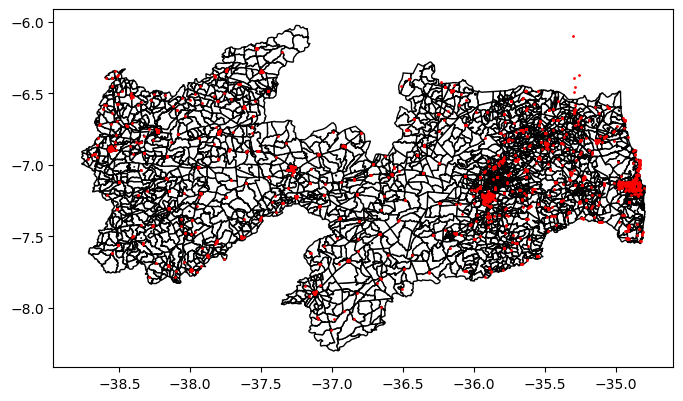

In [23]:
fig, ax = plt.subplots(figsize = (8,8))
setores_pb.plot(ax = ax, color = "white", edgecolor = "black")
unidade.plot(ax = ax, markersize = 1, color = "r")

In [24]:
join = gpd.sjoin(ubs, setores_pb, how = "inner" , op = "intersects" )

C:\Users\mauri\anacondaAtualizado\lib\site-packages\IPython\core\interactiveshell.py:3400: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [25]:
# agora temos acesso as colunas da malha de setores censitário quando selecionamos nosso GeoDataFrame "cols"
join.columns

Index(['CO_UNIDADE', 'CO_CNES', 'NU_CNPJ_MANTENEDORA', 'TP_PFPJ', 'NIVEL_DEP',
       'NO_RAZAO_SOCIAL', 'NO_FANTASIA', 'NO_LOGRADOURO', 'NU_ENDERECO',
       'NO_COMPLEMENTO', 'NO_BAIRRO', 'CO_CEP', 'CO_REGIAO_SAUDE',
       'CO_MICRO_REGIAO', 'CO_DISTRITO_SANITARIO',
       'CO_DISTRITO_ADMINISTRATIVO', 'NU_TELEFONE', 'NU_FAX', 'NO_EMAIL',
       'NU_CPF', 'NU_CNPJ', 'CO_ATIVIDADE', 'CO_CLIENTELA', 'NU_ALVARA',
       'DT_EXPEDICAO', 'TP_ORGAO_EXPEDIDOR', 'DT_VAL_LIC_SANI', 'TP_LIC_SANI',
       'TP_UNIDADE', 'CO_TURNO_ATENDIMENTO', 'CO_ESTADO_GESTOR',
       'CO_MUNICIPIO_GESTOR', 'TO_CHAR(DT_ATUALIZACAO,'DD/MM/YYYY')',
       'CO_USUARIO', 'CO_CPFDIRETORCLN', 'REG_DIRETORCLN',
       'ST_ADESAO_FILANTROP', 'CO_MOTIVO_DESAB', 'NO_URL', 'NU_LATITUDE',
       'NU_LONGITUDE', 'TO_CHAR(DT_ATU_GEO,'DD/MM/YYYY')', 'NO_USUARIO_GEO',
       'CO_NATUREZA_JUR', 'TP_ESTAB_SEMPRE_ABERTO',
       'ST_GERACREDITO_GERENTE_SGIF', 'ST_CONEXAO_INTERNET', 'CO_TIPO_UNIDADE',
       'NO_FANTASIA_ABREV',

## selecionando apenas uma cidade

In [26]:
# podemos selecionar apenas de joão pessoa por exemplo
joao_pessoa = join.loc[join.NM_MUN == "João Pessoa"]

<Axes: >

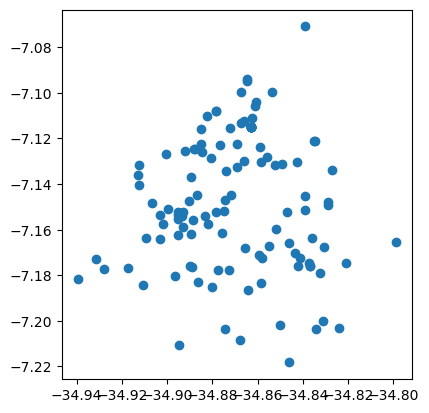

In [27]:
joao_pessoa.plot()

<Axes: >

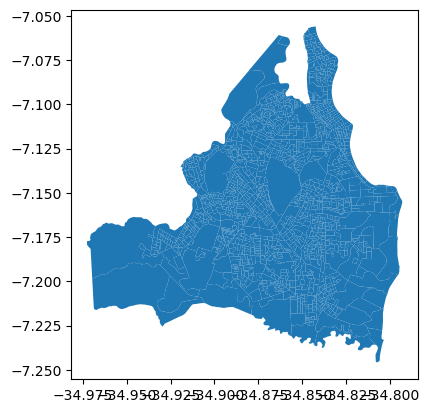

In [30]:
# agora selecionamos apenas a malha de setores de João Pessoa
setores_joao_pessoa = setores_pb.loc[setores_pb.NM_MUN == "João Pessoa"]
setores_joao_pessoa.plot()

<Axes: >

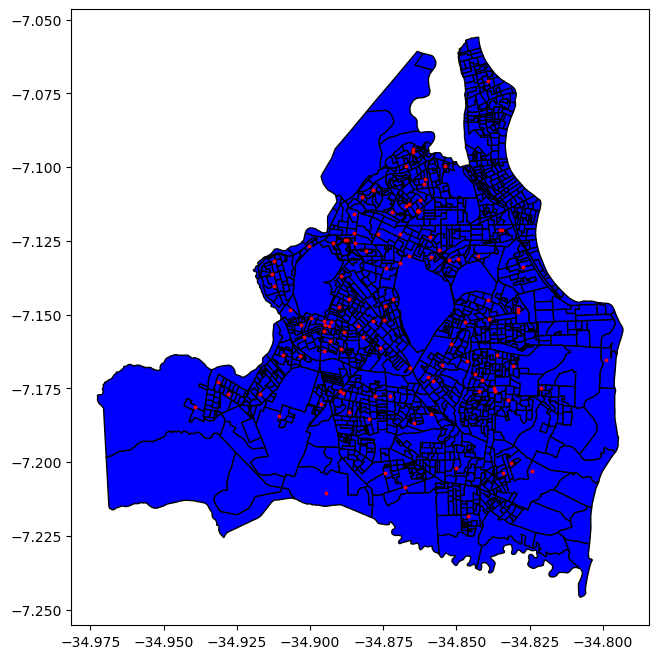

In [31]:
fig, ax = plt.subplots(figsize = (8,8))
setores_joao_pessoa.plot(ax = ax, color = "blue", edgecolor = "black")
joao_pessoa.plot(ax = ax, markersize = 3, color = "r")

## Análises por cidade(João Pessoa)

In [35]:
cnes_jp = join.loc[join.NM_MUN == "João Pessoa"]
cnes_jp.sample(5)

,CO_UNIDADE,CO_CNES,NU_CNPJ_MANTENEDORA,TP_PFPJ,NIVEL_DEP,NO_RAZAO_SOCIAL,NO_FANTASIA,NO_LOGRADOURO,NU_ENDERECO,NO_COMPLEMENTO,...,NM_SIT,CD_UF,NM_UF,SIGLA_UF,CD_MUN,NM_MUN,CD_DIST,NM_DIST,CD_SUBDIST,NM_SUBDIST
268363,2507503063488,3063488.0,8.778326e+12,3.0,3.0,PREFEITURA MUNICIPAL DE JOAO PESSOA,USF PAULO AFONSO,RUA PAULO AFONSO,571,NaN,...,Área Urbana de Baixa Densidade de Edificações,25,Paraíba,PB,2507507,João Pessoa,250750705,João Pessoa,25075070500,NaN
93430,2507502399253,2399253.0,8.778326e+12,3.0,3.0,PREFETURA MUNICIPAL DE JOAO PESSOA,POLICLINICA MUNICIPAL DAS PRAIAS,AV OLINDA,S/N,NaN,...,Área Urbana de Alta Densidade de Edificações,25,Paraíba,PB,2507507,João Pessoa,250750705,João Pessoa,25075070500,NaN
348226,2507502756056,2756056.0,8.806754e+12,3.0,3.0,MUNICIPIO DE JOAO PESSOA,USF INTEGRADA INTEGRANDO VIDAS,RUA DOUTOR ADAILSON NUNES,S/N,NaN,...,Área Urbana de Alta Densidade de Edificações,25,Paraíba,PB,2507507,João Pessoa,250750705,João Pessoa,25075070500,NaN
355124,2507503063224,3063224.0,8.806754e+12,3.0,3.0,MUNICIPIO DE JOAO PESSOA,USF CRUZ DAS ARMAS IV,RUA ENGENHEIRO RETUMBA,207,NaN,...,Área Urbana de Alta Densidade de Edificações,25,Paraíba,PB,2507507,João Pessoa,250750705,João Pessoa,25075070500,NaN
453554,2507502399407,2399407.0,8.806754e+12,3.0,3.0,MUNICIPIO DE JOAO PESSOA,USF INTEGRADA QUALIDADE DE VIDA,RUA BOM JESUS,S/N,NaN,...,Área Urbana de Alta Densidade de Edificações,25,Paraíba,PB,2507507,João Pessoa,250750705,João Pessoa,25075070500,NaN


In [37]:
# CNES por bairro
agrupamento_por_bairro = cnes_jp[["NO_BAIRRO", "CO_UNIDADE"]].groupby("NO_BAIRRO").count()
agrupamento_por_bairro

,CO_UNIDADE
NO_BAIRRO,
13 DE MAIO,1
ALTIPLANO,1
ALTO DO CEU,2
ALTO DO MATEUS,4
BAIRRO DAS INDUSTRIA,1
...,...
TRINCHEIRAS,1
VALENTINA,2
VALENTINA II,1


In [38]:
# quantos quantos cnes temos por setor e quantos setores que tem CNES temos por bairro
agrupamento_bairro_setor = cnes_jp[["NO_BAIRRO", "CD_SETOR", "CO_CNES"]].groupby(["NO_BAIRRO", "CD_SETOR"]).count()
agrupamento_bairro_setor

CO_CNES
NO_BAIRRO      CD_SETOR                
13 DE MAIO     250750705001026        1
ALTIPLANO      250750705001148        1
ALTO DO CEU    250750705000446        1
               250750705000452        1
ALTO DO MATEUS 250750705000257        1
...                                 ...
VALENTINA      250750705000398        1
               250750705000961        1
VALENTINA II   250750705001026        1
VARADOURO      250750705000621        1
VARJAO         250750705000012        1

[116 rows x 1 columns]

## Análises gerais